In [47]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [48]:
data_dir = (r'C:\Users\armej\Desktop\PID\images\data')
data_dir

'C:\\Users\\armej\\Desktop\\PID\\images\\data'

In [49]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('C:/Users/armej/Desktop/PID/images/data')

In [50]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada1.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada2.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada3.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/angry/persona_enojada4.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/happy/persona_feliz.jpg')]

In [51]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

11


In [52]:
Angry = list(data_dir.glob('angry/*'))
Angry[:5]
Happy = list(data_dir.glob('happy/*'))
Happy[:5]
Surprise = list(data_dir.glob('surprise/*'))
Surprise[:5]



[WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada1.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada2.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada3.jpg'),
 WindowsPath('C:/Users/armej/Desktop/PID/images/data/surprise/persona_asustada4.jpg')]

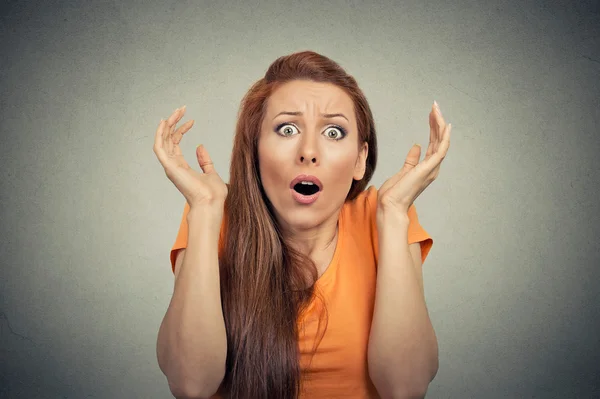

In [53]:

PIL.Image.open(str(Angry[1]))
PIL.Image.open(str(Surprise[1]))
#PIL.Image.open(str(Happy[1]))

In [54]:
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

emotion_dict = {
    'Angry': list(data_dir.glob('Angry/*')),
    'Disgust': list(data_dir.glob('Disgust/*')),
    'Fear': list(data_dir.glob('Fear/*')),
    'Happy': list(data_dir.glob('Happy/*')),
    'Neutral': list(data_dir.glob('Neutral/*')),
    'Sad': list(data_dir.glob('Sad/*')),
    'Surprise': list(data_dir.glob('Surprise/*')),
}

In [55]:
emotion_labels = {
    'Angry': 0,
    'Disgust': 1,
    'Fear': 2,
    'Happy': 3,
    'Neutral': 4,
    'Sad': 5,
    'Surprise': 6,

}

In [56]:
emotion_dict['Angry']
str(emotion_dict['Angry'][0])

'C:\\Users\\armej\\Desktop\\PID\\images\\data\\Angry\\persona_enojada1.jpg'

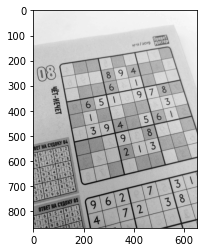

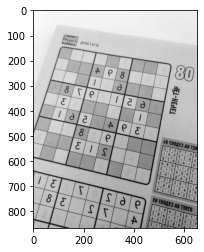

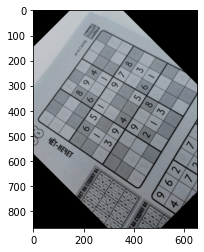

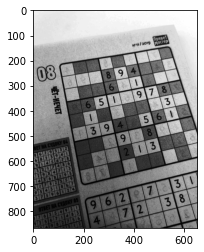

In [57]:
img = cv2.imread(str(emotion_dict['Angry'][3]))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
flip1 = cv2.flip(gray,1)

rows = img.shape[0]
cols = img.shape[1]
img_center = (cols / 2, rows / 2)
M = cv2.getRotationMatrix2D(img_center, 45, 1)
rotated_image = cv2.warpAffine(img, M, (cols, rows))

#img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(gray)
#res = np.hstack((img,equ))


plt.imshow(gray,cmap='gray')
plt.show()
plt.imshow(flip1,cmap='gray')
plt.show()
plt.imshow(rotated_image,cmap='gray')
plt.show()
plt.imshow(equ,cmap='gray')
plt.show()


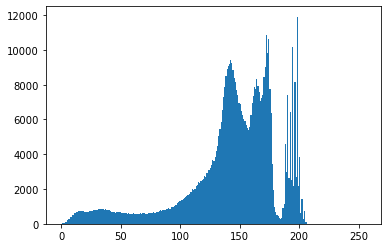

In [58]:
plt.hist(gray.ravel(),256,[0,256]); plt.show()

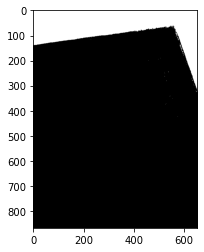

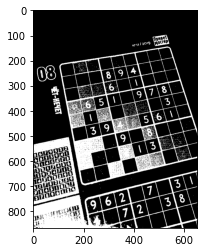

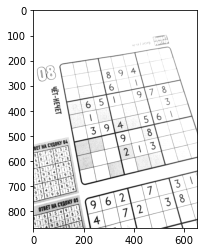

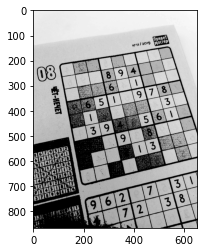

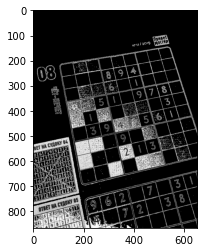

In [59]:
ret,thresh1 = cv2.threshold(gray,180,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

plt.imshow(thresh1,cmap='gray')
plt.show()
plt.imshow(thresh2,cmap='gray')
plt.show()
plt.imshow(thresh3,cmap='gray')
plt.show()
plt.imshow(thresh4,cmap='gray')
plt.show()
plt.imshow(thresh5,cmap='gray')
plt.show()

[[[131  36]]

 [[130  37]]

 [[120  37]]

 [[119  38]]

 [[113  38]]

 [[112  39]]

 [[107  39]]

 [[106  40]]

 [[102  40]]

 [[101  41]]

 [[ 96  41]]

 [[ 95  42]]

 [[ 90  42]]

 [[ 89  43]]

 [[ 85  43]]

 [[ 84  44]]

 [[ 79  44]]

 [[ 78  45]]

 [[ 71  45]]

 [[ 70  46]]

 [[ 65  46]]

 [[ 64  47]]

 [[ 59  47]]

 [[ 58  48]]

 [[ 53  48]]

 [[ 52  49]]

 [[ 46  49]]

 [[ 45  50]]

 [[ 39  50]]

 [[ 38  51]]

 [[ 32  51]]

 [[ 31  52]]

 [[ 28  52]]

 [[ 27  53]]

 [[ 26  53]]

 [[ 26  54]]

 [[ 25  55]]

 [[ 25  58]]

 [[ 26  59]]

 [[ 26  63]]

 [[ 27  64]]

 [[ 27  68]]

 [[ 28  69]]

 [[ 28  74]]

 [[ 29  75]]

 [[ 29  79]]

 [[ 30  80]]

 [[ 30  84]]

 [[ 31  85]]

 [[ 31  89]]

 [[ 32  90]]

 [[ 32  94]]

 [[ 33  95]]

 [[ 33  99]]

 [[ 34 100]]

 [[ 34 105]]

 [[ 35 106]]

 [[ 35 110]]

 [[ 36 111]]

 [[ 36 116]]

 [[ 37 117]]

 [[ 37 121]]

 [[ 38 122]]

 [[ 38 126]]

 [[ 39 127]]

 [[ 39 130]]

 [[ 40 131]]

 [[ 40 134]]

 [[ 41 135]]

 [[ 41 140]]

 [[ 42 141]]

 [[ 42

KeyboardInterrupt: 

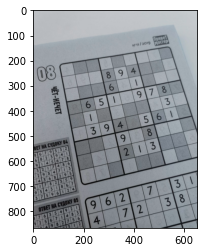

In [60]:
img = cv2.imread(str(emotion_dict['Angry'][3]))
plt.imshow(img)
image = cv2.resize(img, (img.shape[1] // 4, img.shape[0] // 4))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
for counter in contours:
    area = cv2.contourArea(counter)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = counter

print(best_cnt)
mask = np.zeros((gray.shape), np.uint8)

cv2.drawContours(mask, [best_cnt], 0, 255, -1)
cv2.drawContours(mask, [best_cnt], 0, 0, 2)

cv2.imwrite('mask_jigsaw.jpg', mask)

cv2.imshow("Image Mask", mask)
cv2.waitKey(0)

(180, 180)


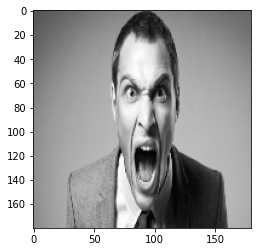

In [ ]:
gray = cv2.resize(gray,(180,180))

#ANG = (r'C:/Users/armej/Desktop/PID/images/angry')
#cv2.imwrite(os.path.join(ANG,"enojada.jpg"),gray)
print(gray.shape)
plt.imshow(gray,cmap='gray')

In [ ]:
X, y = [], []
for flower_name, images in emotion_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        flip = cv2.flip(gray,1)
        resized_img = cv2.resize(gray,(180,180))
        X.append(resized_img)
        y.append(emotion_labels[flower_name])
        

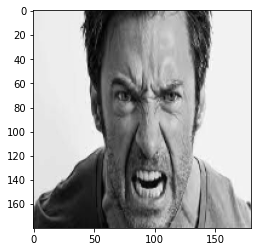

In [ ]:
plt.imshow(X[0],cmap='gray')

In [ ]:


Angry = (r'C:\Users\armej\Desktop\PID\images\data_aug\angry')
Disgust = (r'C:\Users\armej\Desktop\PID\images\data_aug\disgust')
Fear = (r'C:\Users\armej\Desktop\PID\images\data_aug\fear')
Happy = (r'C:\Users\armej\Desktop\PID\images\data_aug\happy')
Neutral = (r'C:\Users\armej\Desktop\PID\images\data_aug\neutral')
Sad = (r'C:\Users\armej\Desktop\PID\images\data_aug\sad')
Surprise = (r'C:\Users\armej\Desktop\PID\images\data_aug\surprise')


motion_dict = [Angry,Disgust,Fear,Happy,Neutral,Sad,Surprise]
X, y = [], []    
i = -1
for emotion_name, images in emotion_dict.items():
    i = i +1 
    j = -1
    for image in images:
        j = j + 1    
        #image load
        img = cv2.imread(str(image))
        #convert to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #reshape the image
        resized_img = cv2.resize(gray,(40,40))
        #flip  the image 
        flip = cv2.flip(resized_img,1)
        #name of the image to save
        name = 'people_' + str(emotion_name) + '_'+str(j)+'.jpg'
        #save of the image    
        cv2.imwrite(os.path.join(motion_dict[i],name),resized_img)
        # increment of j to no delete other image
        j = j + 1        
        name = 'people_' + str(emotion_name) + '_'+str(j)+'.jpg'
        cv2.imwrite(os.path.join(motion_dict[i],name),flip)

        

        X.append(resized_img)
        y.append(emotion_dict[emotion_name])

        


In [ ]:
X

In [ ]:
motion_dict.items()